In [120]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps

from config import api_key_maps

# Configure gmaps
gmaps.configure(api_key=api_key_maps)

# Files to Load
airbnb_data = "data_base_clean.csv"

# Read Aribnb Data File and store into Pandas Data Frames
airbnb_df=pd.read_csv(airbnb_data)

# Show Airbnb dataframe to validate
airbnb_df.head()


id                                               name  host_id  \
0  22787  Sunny suite w/ queen size bed, inside boutique...    87973   
1  44616                          CONDESA HAUS BOUTIQUE B&B   196253   
2  58955                 Entire beautiful duplex in la Roma   282620   
3  61792  Spacious Clean Quiet room (own bath) in la Con...   299558   
4  67703                  2 bedroom apt. deco bldg, Condesa   334451   

                            host_name neighbourhood_cleansed neighbourhood  \
0                               Diego             Cuauhtemoc    San Rafael   
1  Condesa Haus Bed & BReakfast  CDMX             Cuauhtemoc       Condesa   
2                                 Nat             Cuauhtemoc    Roma Norte   
3                             Roberto             Cuauhtemoc       Condesa   
4                            Nicholas             Cuauhtemoc     Hipodromo   

  zipcode  latitude  longitude        room_type  price  minimum_nights  \
0    6470  19.44076  -99.16324     Private room   1957               1   
1    6140  19.41006  -99.17645     Private room   1906               1   
2    6700  19.42292  -99.15775  Entire home/apt   1620               3   
3    6140  19.41259  -99.17959     Private room    953               2   
4    6100  19.41375  -99.17028  Entire home/apt   1810               2   

   number_of_reviews last_review  reviews_per_month  \
0                 10  11/05/2018               0.58   
1                 39  02/05/2019               0.43   
2                 37  01/01/2019               0.41   
3                 51  05/04/2019               2.69   
4                 39  24/02/2019               0.43   

   calculated_host_listings_count  availability_365  bed_type  \
0                               8                 0  Real Bed   
1                              10               330  Real Bed   
2                               1               173  Real Bed   
3                               3               180  Real Bed   
4                               3               340  Real Bed   

                                           amenities  review_scores_rating  
0  {Wifi,"Paid parking off premises",Breakfast,Wa...                  87.0  
1  {TV,"Cable TV",Internet,Wifi,"Free parking on ...                  89.0  
2  {Internet,Wifi,"Wheelchair accessible",Kitchen...                 100.0  
3  {TV,Wifi,Kitchen,"Free street parking",Heating...                  98.0  
4  {TV,"Cable TV",Internet,Wifi,Kitchen,"Buzzer/w...                  98.0

In [121]:
airbnb_reduced=airbnb_df[["id","neighbourhood_cleansed","neighbourhood","zipcode","latitude","longitude","price",]]
airbnb_reduced.head()

id neighbourhood_cleansed neighbourhood zipcode  latitude  longitude  \
0  22787             Cuauhtemoc    San Rafael    6470  19.44076  -99.16324   
1  44616             Cuauhtemoc       Condesa    6140  19.41006  -99.17645   
2  58955             Cuauhtemoc    Roma Norte    6700  19.42292  -99.15775   
3  61792             Cuauhtemoc       Condesa    6140  19.41259  -99.17959   
4  67703             Cuauhtemoc     Hipodromo    6100  19.41375  -99.17028   

   price  
0   1957  
1   1906  
2   1620  
3    953  
4   1810

In [122]:
airbnb_reduced["price"].describe()

count     10696.000000
mean       1148.362565
std        2780.347372
min           0.000000
25%         457.000000
50%         800.000000
75%        1315.000000
max      190573.000000
Name: price, dtype: float64

In [123]:
# Remove properties with no price per night 
airbnb_positive=airbnb_reduced.loc[airbnb_reduced["price"]>0,["id","neighbourhood_cleansed","neighbourhood","zipcode","latitude","longitude","price"]]
airbnb_positive.head()

id neighbourhood_cleansed neighbourhood zipcode  latitude  longitude  \
0  22787             Cuauhtemoc    San Rafael    6470  19.44076  -99.16324   
1  44616             Cuauhtemoc       Condesa    6140  19.41006  -99.17645   
2  58955             Cuauhtemoc    Roma Norte    6700  19.42292  -99.15775   
3  61792             Cuauhtemoc       Condesa    6140  19.41259  -99.17959   
4  67703             Cuauhtemoc     Hipodromo    6100  19.41375  -99.17028   

   price  
0   1957  
1   1906  
2   1620  
3    953  
4   1810

In [124]:
# Remove properties with  excesively price per night (outliers)
airbnb_real=airbnb_positive.loc[airbnb_reduced["price"]<37000,["id","neighbourhood_cleansed","neighbourhood","zipcode","latitude","longitude","price"]]
airbnb_real.head()

id neighbourhood_cleansed neighbourhood zipcode  latitude  longitude  \
0  22787             Cuauhtemoc    San Rafael    6470  19.44076  -99.16324   
1  44616             Cuauhtemoc       Condesa    6140  19.41006  -99.17645   
2  58955             Cuauhtemoc    Roma Norte    6700  19.42292  -99.15775   
3  61792             Cuauhtemoc       Condesa    6140  19.41259  -99.17959   
4  67703             Cuauhtemoc     Hipodromo    6100  19.41375  -99.17028   

   price  
0   1957  
1   1906  
2   1620  
3    953  
4   1810

In [125]:
airbnb_real["price"].describe()

count    10686.000000
mean      1111.986057
std       1393.130297
min        172.000000
25%        457.000000
50%        800.000000
75%       1315.000000
max      36484.000000
Name: price, dtype: float64

In [126]:
#rename Neighbourhood_cleansed column

airbnb_real.rename(columns={"neighbourhood_cleansed":"county"})


id             county                 neighbourhood  zipcode  \
0         22787         Cuauhtemoc                    San Rafael     6470   
1         44616         Cuauhtemoc                       Condesa     6140   
2         58955         Cuauhtemoc                    Roma Norte     6700   
3         61792         Cuauhtemoc                       Condesa     6140   
4         67703         Cuauhtemoc                     Hipodromo     6100   
5         70644           Coyoacan                      Coyoacan     4100   
6         70737           Coyoacan                      Coyoacan     4100   
7        180808         Cuauhtemoc                        Juarez     6600   
8        245507         Cuauhtemoc                        Juarez     6600   
9        246057         Cuauhtemoc                        Juarez     6600   
10       256555     Miguel Hidalgo        San Miguel Chapultepec    11850   
11       261897         Cuauhtemoc                    Roma Norte     6700   
12       271048     Miguel Hidalgo                       Anzures    11590   
13       287015         Cuauhtemoc                    Roma Norte     6700   
14       298873         Cuauhtemoc              Centro Historico     6000   
15       325812         Cuauhtemoc              Centro Historico     6000   
16       326296           Coyoacan                Florida/Axotla     4318   
17       326475         Cuauhtemoc                    Roma Norte     6700   
18       331788         Cuauhtemoc                    Roma Norte     6700   
19       375032         Cuauhtemoc                     Hipodromo     6100   
20       386265           Coyoacan                      Coyoacan     4040   
21       393788         Cuauhtemoc                      Roma Sur     6760   
22       394589         Cuauhtemoc            Colonia Cuauhtemoc     6500   
23       395446         Cuauhtemoc                       Condesa     6170   
24       400047         Cuauhtemoc                     Hipodromo     6100   
25       419110         Cuauhtemoc                       Condesa     6170   
26       421607      Benito Juarez                      Narvarte     3000   
27       422159      Benito Juarez                        Postal     3530   
28       424258     Alvaro Obregon                      Nonoalco     1180   
29       454077         Cuauhtemoc              Centro Historico     6000   
...         ...                ...                           ...      ...   
10666  34415314         Cuauhtemoc            Colonia Cuauhtemoc   6500.0   
10667  34418384         Cuauhtemoc                     Hipodromo   6100.0   
10668  34422675         Cuauhtemoc                       Condesa   6140.0   
10669  34423492         Cuauhtemoc                      Roma Sur   6760.0   
10670  34433994     Miguel Hidalgo                       Polanco  11000.0   
10671  34441620         Cuauhtemoc                       Condesa   6170.0   
10672  34445486      Benito Juarez                      Narvarte   3023.0   
10673  34460674         Cuauhtemoc                        Obrera   6800.0   
10674  34471352         Cuauhtemoc        Santa MarÃ­a La Ribera   6400.0   
10675  34474898     Miguel Hidalgo                       Polanco  11529.0   
10676  34476570      Benito Juarez                       Napoles   3810.0   
10677  34479828           Coyoacan                      Coyoacan   6300.0   
10678  34480017         Cuauhtemoc                    San Rafael   6470.0   
10679  34498624     Miguel Hidalgo                       Polanco  11540.0   
10680  34538067      Benito Juarez                     Del Valle   3100.0   
10681  34538884         Cuauhtemoc            Colonia Cuauhtemoc   6500.0   
10682  34546163     Miguel Hidalgo                       Polanco  11520.0   
10683  34550043         Cuauhtemoc                    Roma Norte   6700.0   
10684  34566861     Miguel Hidalgo                       Anzures  11590.0   
10685  34568956         Cuauhtemoc                      Transito   6820.0   
10686  34

In [127]:
# Start with CDMX SUMMARY
# Calculate the total number of properties using nunique
properties_count=airbnb_real["id"].nunique()
#Validate
print(properties_count)

10686


In [128]:
#Count properties per counties
properties_per_county=airbnb_real.groupby(["neighbourhood_cleansed"]).count()["id"]
print(properties_per_county)

neighbourhood_cleansed
Alvaro Obregon          264
Azcapotzalco             27
Benito Juarez          2009
Coyoacan                748
Cuauhtemoc             5674
Gustavo A. Madero        12
Iztacalco                32
Iztapalapa               15
Miguel Hidalgo         1881
Venustiano Carranza      24
Name: id, dtype: int64


In [129]:
#Calculate the average price per night
night_average=airbnb_real["price"].mean()
#Validate
print(night_average)

1111.9860565225529


In [130]:
county_distribution=properties_per_county/properties_count*100
print(county_distribution)

neighbourhood_cleansed
Alvaro Obregon          2.470522
Azcapotzalco            0.252667
Benito Juarez          18.800299
Coyoacan                6.999813
Cuauhtemoc             53.097511
Gustavo A. Madero       0.112296
Iztacalco               0.299457
Iztapalapa              0.140371
Miguel Hidalgo         17.602471
Venustiano Carranza     0.224593
Name: id, dtype: float64


In [131]:
#price average in each county
average_price_per_county = airbnb_real.groupby(["neighbourhood_cleansed"]).mean()["price"]
print(average_price_per_county)

neighbourhood_cleansed
Alvaro Obregon          870.700758
Azcapotzalco            651.888889
Benito Juarez           706.930314
Coyoacan                892.862299
Cuauhtemoc             1188.152450
Gustavo A. Madero       609.583333
Iztacalco               444.312500
Iztapalapa              700.133333
Miguel Hidalgo         1466.392344
Venustiano Carranza     634.875000
Name: price, dtype: float64


In [132]:
#Create a dataframe to hold the above results
CDMX_Summary = pd.DataFrame({  "Available Properties in County"   : properties_per_county, 
                               "% of Total Available Properties"  : county_distribution,
                               "Average Night Price"              : average_price_per_county})  


In [133]:
CDMX_Summary=CDMX_Summary[["Available Properties in County","% of Total Available Properties","Average Night Price"]]
CDMX_Summary

Available Properties in County  \
neighbourhood_cleansed                                   
Alvaro Obregon                                     264   
Azcapotzalco                                        27   
Benito Juarez                                     2009   
Coyoacan                                           748   
Cuauhtemoc                                        5674   
Gustavo A. Madero                                   12   
Iztacalco                                           32   
Iztapalapa                                          15   
Miguel Hidalgo                                    1881   
Venustiano Carranza                                 24   

                        % of Total Available Properties  Average Night Price  
neighbourhood_cleansed                                                        
Alvaro Obregon                                 2.470522           870.700758  
Azcapotzalco                                   0.252667           651.888889  
Benito Juarez                                 18.800299           706.930314  
Coyoacan                                       6.999813           892.862299  
Cuauhtemoc                                    53.097511          1188.152450  
Gustavo A. Madero                              0.112296           609.583333  
Iztacalco                                      0.299457           444.312500  
Iztapalapa                                     0.140371           700.133333  
Miguel Hidalgo                                17.602471          1466.392344  
Venustiano Carranza                            0.224593           634.875000

In [134]:
#Sort and display ascending price
Highest_Price_Counties = CDMX_Summary.sort_values("Average Night Price", ascending=False)

Highest_Price_Counties.head(10)

Available Properties in County  \
neighbourhood_cleansed                                   
Miguel Hidalgo                                    1881   
Cuauhtemoc                                        5674   
Coyoacan                                           748   
Alvaro Obregon                                     264   
Benito Juarez                                     2009   
Iztapalapa                                          15   
Azcapotzalco                                        27   
Venustiano Carranza                                 24   
Gustavo A. Madero                                   12   
Iztacalco                                           32   

                        % of Total Available Properties  Average Night Price  
neighbourhood_cleansed                                                        
Miguel Hidalgo                                17.602471          1466.392344  
Cuauhtemoc                                    53.097511          1188.152450  
Coyoacan                                       6.999813           892.862299  
Alvaro Obregon                                 2.470522           870.700758  
Benito Juarez                                 18.800299           706.930314  
Iztapalapa                                     0.140371           700.133333  
Azcapotzalco                                   0.252667           651.888889  
Venustiano Carranza                            0.224593           634.875000  
Gustavo A. Madero                              0.112296           609.583333  
Iztacalco                                      0.299457           444.312500

In [135]:
#Sort and display ascending percentage of properties
Highest_Available_Properties = CDMX_Summary.sort_values("% of Total Available Properties", ascending=False)

Highest_Available_Properties.head(10)

Available Properties in County  \
neighbourhood_cleansed                                   
Cuauhtemoc                                        5674   
Benito Juarez                                     2009   
Miguel Hidalgo                                    1881   
Coyoacan                                           748   
Alvaro Obregon                                     264   
Iztacalco                                           32   
Azcapotzalco                                        27   
Venustiano Carranza                                 24   
Iztapalapa                                          15   
Gustavo A. Madero                                   12   

                        % of Total Available Properties  Average Night Price  
neighbourhood_cleansed                                                        
Cuauhtemoc                                    53.097511          1188.152450  
Benito Juarez                                 18.800299           706.930314  
Miguel Hidalgo                                17.602471          1466.392344  
Coyoacan                                       6.999813           892.862299  
Alvaro Obregon                                 2.470522           870.700758  
Iztacalco                                      0.299457           444.312500  
Azcapotzalco                                   0.252667           651.888889  
Venustiano Carranza                            0.224593           634.875000  
Iztapalapa                                     0.140371           700.133333  
Gustavo A. Madero                              0.112296           609.583333

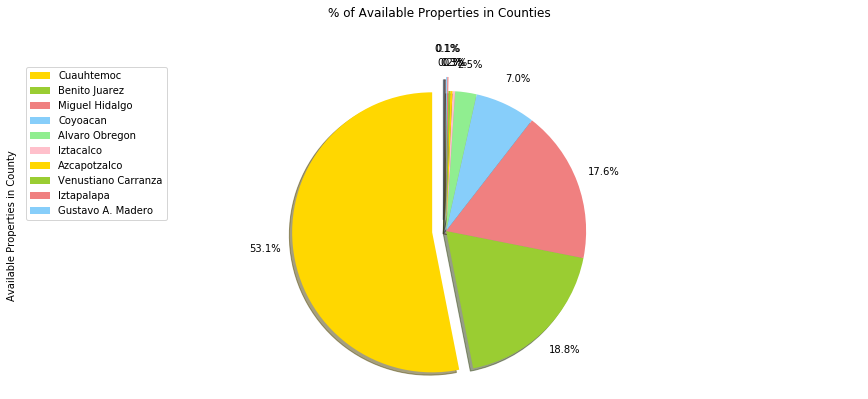

In [166]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0,0,0,0,0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

Highest_Available_Properties['Available Properties in County'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.2,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('% of Available Properties in Counties', y=1.12) 
 
plt.axis('equal') 
 
# add legend
plt.legend(labels=Highest_Available_Properties.index, loc='upper left') 
 
plt.show()
 

In [89]:
# For Map graph

# Store latitude and longitude in locations
locations = airbnb_real[["latitude", "longitude"]]

price= airbnb_real["price"].astype(float)

In [103]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=price, 
                                 dissipating=False, max_intensity=1000000,
                                 point_radius=10)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))